In [1]:
import pandas as pd
from augment import augment_dataframe, fix_max_ge_value, plot_metric_bw_style

## [coffee_sience.csv](../../data/raw/coffee_science.csv)
- Статья: [Effect of flight operative height and genotypes on conilon coffee spraying using an unmanned aerial vehicle](https://coffeescience.ufla.br/index.php/Coffeescience/article/view/2003)
- Эксперимент: Effect of the operational height of application and the conilon coffee genotype
- Описание данных:
<center>
<table>
    <tr>
        <td colspan="4">Название столбца</td>
        <td>Описание</td>
    </tr>
    <tr>
        <td colspan="5"></td>
    </tr>
    <tr>
        <td colspan="4">plant</td>
        <td><b>Характеристики плантации</b></td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.name</td>
        <td>Название</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.cultivar</td>
        <td>Сорт</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.genotype</td>
        <td>Генотип</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.phenotypes</td>
        <td><b><i>Фенотипы (в среднем)</i></b></td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.plagiotropic_node_number</td>
        <td>количество узлов на плагиотропных ветвях (шт)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.plagiotropic_node_distance</td>
        <td>расстояние между узлами плагиотропных ветвей (см)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.orthotropic_branch_length</td>
        <td>длина ортотропных ветвей (см)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.orthotropic_branch_node_number</td>
        <td>количество узлов на ортотропных ветвях (шт)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.height</td>
        <td>Высота (м)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.diameter</td>
        <td>диаметр полога (см)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.leaf_area</td>
        <td>площадь листьев (см²)</td>
    </tr>
    <tr>
        <td colspan="5"></td>
    </tr>
    <tr>
        <td colspan="4">model</td>
        <td><b>Характеристики БПЛА</b></td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.name</td>
        <td>Название</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.tank_volume</td>
        <td>Объём бака (л)</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.rotors</td>
        <td><b><i>Характеристики пропеллеров</i></b></td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.number</td>
        <td>Количество (шт)</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.nozzles</td>
        <td><b><i>Характеристики форсунок</i></b></td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.type</td>
        <td>Название модели</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.number</td>
        <td>Количество (шт)</td>
    </tr>
    <tr>
        <td colspan="5"></td>
    </tr>
    <tr>
        <td colspan="4">experiment</td>
        <td><b>Параметры эксперимента</b></td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.name</td>
        <td>Кодовое название</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.weather</td>
        <td><b><i>Погодные условия</i></b></td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.temperature</td>
        <td><i>Диапазон температур</i></td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.min</td>
        <td>Нижняя граница (°C)</td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.max</td>
        <td>Верхняя граница (°C)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.humidity</td>
        <td><i>Диапазон влажности воздуха</i></td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.min</td>
        <td>Нижняя граница (%)</td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.max</td>
        <td>Верхняя граница (%)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.velocity</td>
        <td><i>Диапазон скорости ветра</i></td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.min</td>
        <td>Нижняя граница (м/с)</td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.max</td>
        <td>Верхняя граница (м/с)</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.params</td>
        <td><b><i>Настраиваемые параметры БПЛА</i></b></td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.height</td>
        <td>Рабочая высота (м)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.flight_speed</td>
        <td>Скорость полёта (м/с)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.spray_volume</td>
        <td>Объём опрыскивания (л/га)</td>
    </tr>
    <tr>
        <td></td>
        <td colspan="3">.results</td>
        <td><b><i>Результаты</i></b></td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.coverage</td>
        <td><i>Покрытие</i></td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.value</td>
        <td>Среднее значение (%)</td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.CV</td>
        <td>Коэффициент вариации (%)</td>
    </tr>
    <tr>
        <td></td><td></td>
        <td colspan="2">.droplet_size</td>
        <td><i>Размер капель</i></td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.value</td>
        <td>Среднее значение (мкм)</td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.max</td>
        <td>Максимальное значение (мкм)</td>
    </tr>
    <tr>
        <td></td><td></td><td></td>
        <td>.CV</td>
        <td>Коэффициент вариации (%)</td>
    </tr>
    <tr>
        <td colspan="5"></td>
    </tr>
</table>
</center>

In [2]:
# Задаём пути и читаем исходные данные
root = "../.."
path_from = f"{root}/data/raw"
path_to = f"{root}/data/augmented"
name = "coffee_science"

data = pd.read_csv(f"{path_from}/{name}.csv")

In [3]:
# Настраиваем, какие поля и на сколько варьировать
schema = {
    "plant.phenotypes.plagiotropic_node_number": (0.005, 0.01),
    "plant.phenotypes.plagiotropic_node_distance": (0.005, 0.01),
    "plant.phenotypes.orthotropic_branch_length": (0.005, 0.01),
    "plant.phenotypes.orthotropic_branch_node_number": (0.005, 0.01),
    "plant.phenotypes.height": (0.005, 0.01),
    "plant.phenotypes.leaf_area": (0.005, 0.01),
    "experiment.weather.temperature.min": (0.02, 0.05),
    "experiment.weather.temperature.max": (0.02, 0.05),
    "experiment.weather.humidity.min": (0.02, 0.05),
    "experiment.weather.humidity.max": (0.02, 0.05),
    "experiment.weather.velocity.min": (0.05, 0.1),
    "experiment.weather.velocity.max": (0.05, 0.1),
    "experiment.params.height": (0.05, 0.1),
    "experiment.params.flight_speed": (0.05, 0.1),
    "experiment.params.spray_volume": (0.05, 0.1),
    "experiment.results.coverage.value": (0.01, 0.03),
    "experiment.results.coverage.max": (0.01, 0.03),
    "experiment.results.coverage.CV": (0.01, 0.03),
    "experiment.results.droplet_size.value": (0.01, 0.03),
    "experiment.results.droplet_size.max": (0.01, 0.03),
    "experiment.results.droplet_size.CV": (0.01, 0.03),
}

In [4]:
# Аугментация ×5 и сохранение
data_augmented_x5 = augment_dataframe(data, schema)
data_augmented_x5 = fix_max_ge_value(data_augmented_x5, schema)
data_augmented_x5.to_csv(f"{path_to}/{name}_x5.csv", index=False)

In [5]:
# Аугментация ×10 и сохранение
data_augmented_x10 = augment_dataframe(data, schema, n=9)
data_augmented_x10 = fix_max_ge_value(data_augmented_x10, schema)
data_augmented_x10.to_csv(f"{path_to}/{name}_x10.csv", index=False)

In [6]:
# Порядок экспериментов
experiment_order = [f"T{i}" for i in range(1,10)]

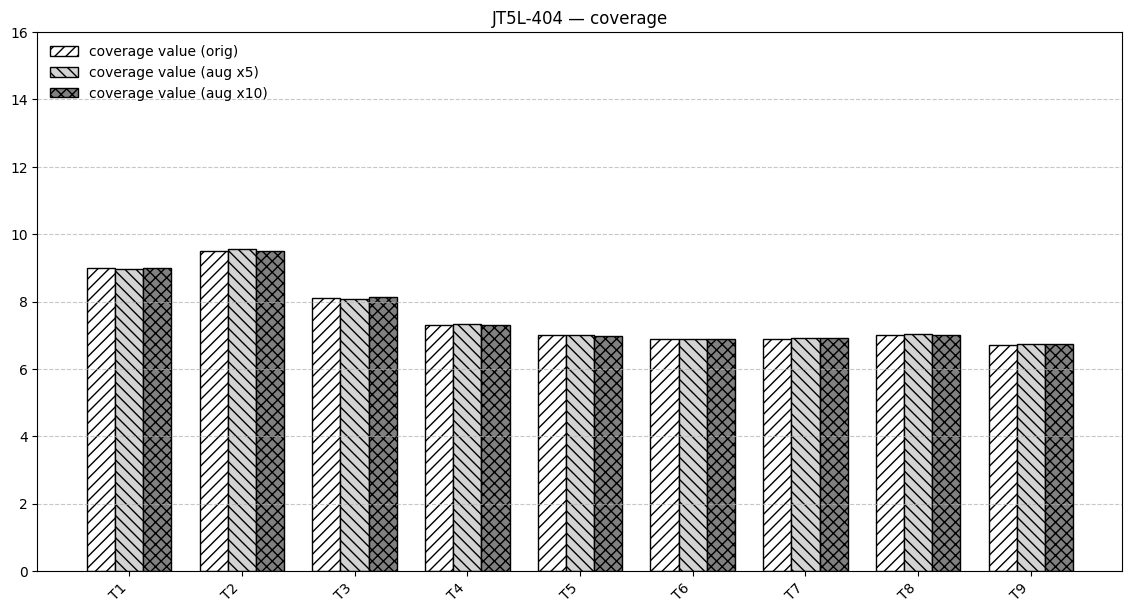

In [9]:
# Coverage
plot_metric_bw_style(
    data, data_augmented_x5, data_augmented_x10,
    "JT5L-404",
    "coverage",
    experiment_order=experiment_order,
    y_value_range=(0, 16),
)

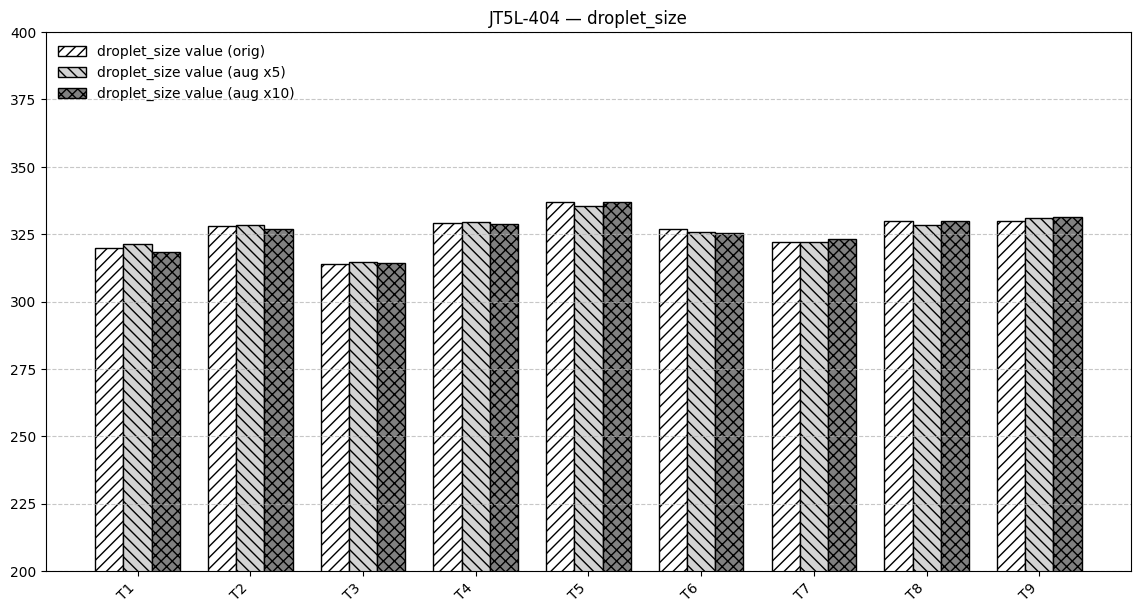

In [12]:
# Droplet Size
plot_metric_bw_style(
    data, data_augmented_x5, data_augmented_x10,
    "JT5L-404",
    "droplet_size",
    experiment_order=experiment_order,
    y_value_range=(200, 400)
)